# Week3授業前課題2 住宅情報の分析

## 【問題1】データセットの取得

In [31]:
import pandas as pd
import numpy as np
df = pd.read_csv("dataset/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## 【問題2】データセット自体の調査

アイオワ州エイムスの住宅販売価格を予測するためのデータセット。  
立地条件や外装、内装など住宅に関する79個の説明変数と、目的変数である販売価格から構成されています。

## 【問題3】データの確認

### 各特徴量がどういったものかを見る。（数値データか文字データなど）

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

浮動小数点型が3個、整数型が33個、文字型が43個で構成。

### 今回の目的変数はどの列か確認する。

SalePrice の列が目的変数です。

### 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [33]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 【問題4】欠損値への対応

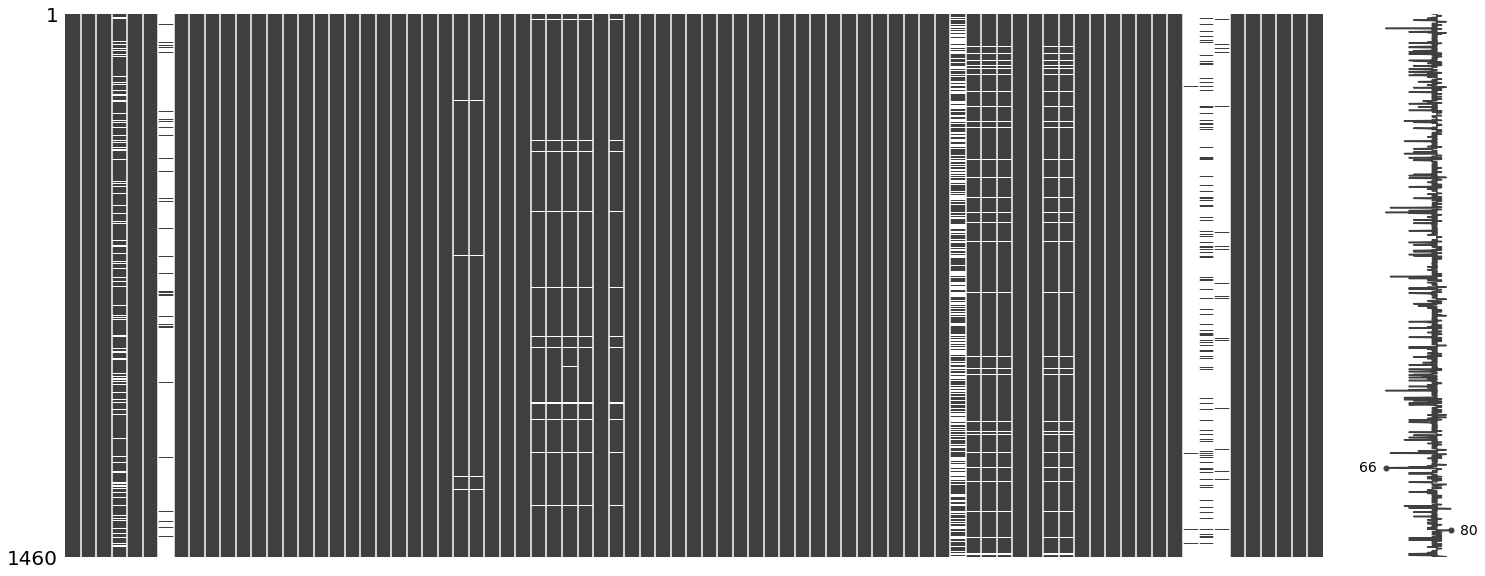

In [34]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

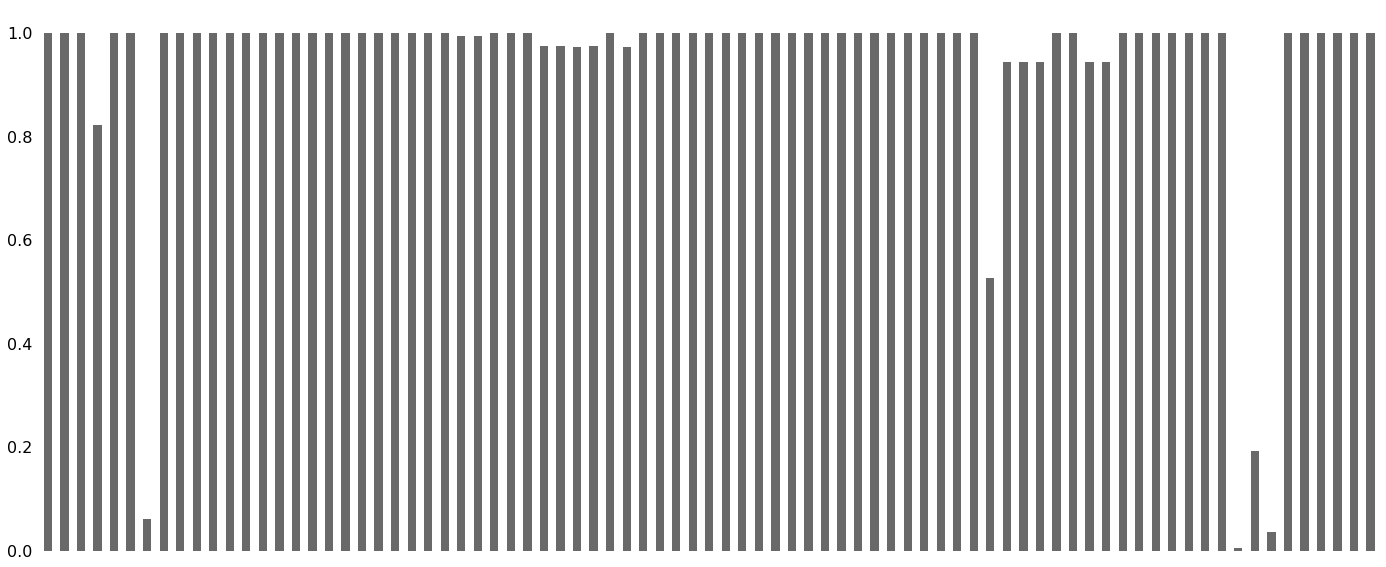

In [35]:
msno.bar(df)

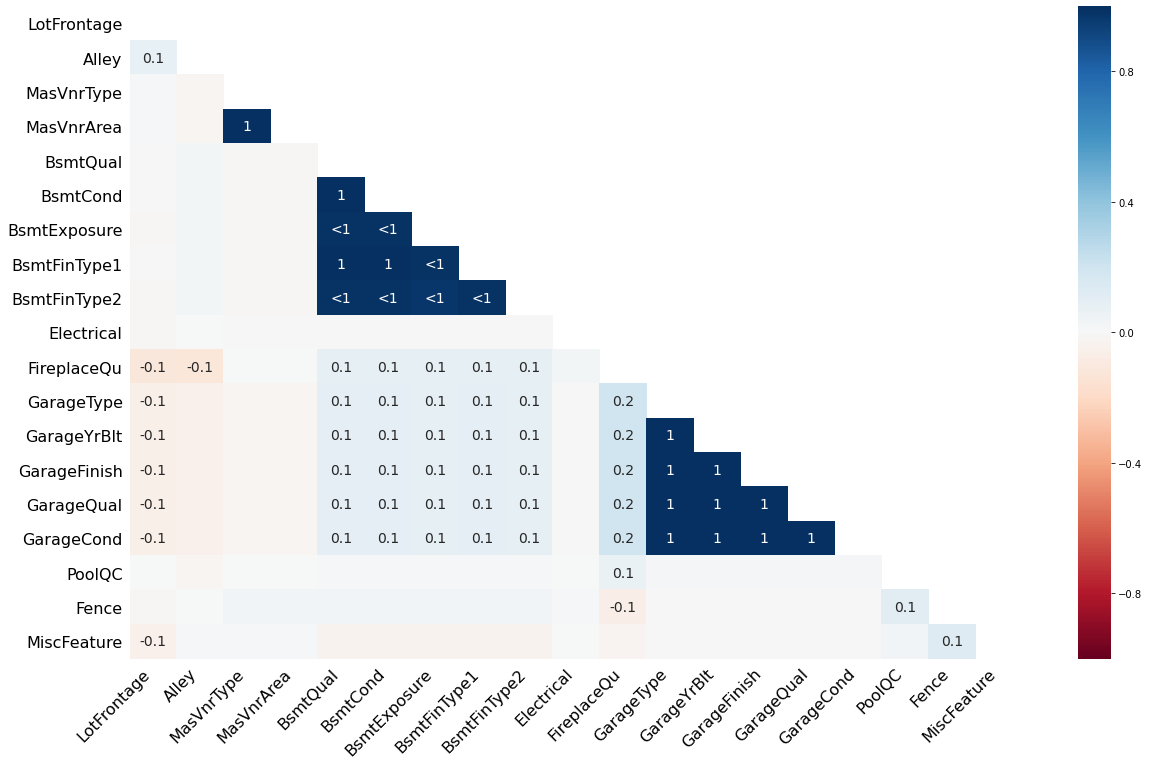

In [36]:
msno.heatmap(df)

### 欠損値が何パーセント含まれるかを確認

In [37]:
# 欠損値の件数
df.isnull().sum()/len(df) 

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [38]:
# 欠損値の割合
df.isnull().sum()/len(df) *100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [39]:
# 結合して表示
id_all = df.isnull().sum()
id_null = df.isnull().sum()/len(df) *100
df_missing_data = pd.concat([id_all, id_null], axis=1) # 欠損値の件数と割合を結合
df_missing_data = df_missing_data.rename(columns={0:'Total', 1:'missing_ratio'}) #カラムのリネーム
df_missing_data[1:] # id行は削除して表示

,Total,missing_ratio
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,17.739726
LotArea,0,0.000000
Street,0,0.000000
...,...,...
MoSold,0,0.000000
YrSold,0,0.000000
SaleType,0,0.000000
SaleCondition,0,0.000000


### 5つ以上欠損値がある特徴量（列）を削除

In [40]:
id_all = df.isnull().sum()
id_null = df.isnull().sum()/len(df) *100
df_missing_data = pd.concat([id_all, id_null], axis=1) # 欠損値の件数と割合を結合
df_missing_data = df_missing_data.rename(columns={0:'Total', 1:'missing_ratio'}) #カラムのリネーム
df_drop = df_missing_data.query("Total >= 5") #.index
print("欠損値が5以上ある特徴量 :{}".format(df_drop.index))

欠損値が5以上ある特徴量 :Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')


In [41]:
# 欠損値が5以上の特徴量を削除
df_five_under = df.drop(df_drop.index, axis=1)
df_five_under

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


### 欠損値があるサンプル（行）を削除

In [42]:
df_dropna = df_five_under.dropna(axis=0)
df_dropna

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


## 【問題5】用語の調査

### 尖度

尖度（せんど、英: kurtosis)は、確率変数の確率密度関数や頻度分布の鋭さを表す数字である。  
正規分布と比べて、尖度が大きければ鋭いピークと長く太い裾を持った分布を持ち、尖度が小さければより丸みがかったピークと短く細い尾を持った分布であるという事が判断できる。  
正規分布の尖度を0とする定義と3とする定義があり、一般には0とすることが多い。

### 歪度

歪度（わいど、skewness）は、分布の非対称性を示す指標である。日本産業規格では、ゆがみ、ひずみを確率密度関数または確率関数 f(x) のグラフが左右対称でないこと、ゆがみの程度を平均値まわりの 3次モーメント µ3 と標準偏差 σ の 3 乗との比 µ3/σ3 と定義している[1]。

## 【問題6】分布の確認

### seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出

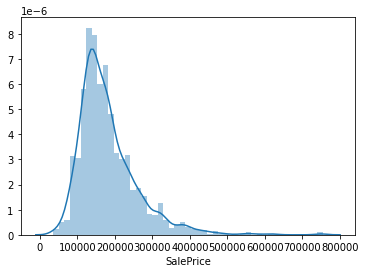

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.distplot(df['SalePrice'])
plt.show()

In [44]:
print("目的変数（SalePrice）の尖度: {:.2f}".format(df['SalePrice'].kurt()))
print("目的変数（SalePrice）の歪度: {:.2f}".format(df['SalePrice'].skew()))

目的変数（SalePrice）の尖度: 6.54
目的変数（SalePrice）の歪度: 1.88


### 目的変数に対して対数変換を行う

In [45]:
df_converted = df['SalePrice'].apply(np.log)
df_converted

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

### 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する


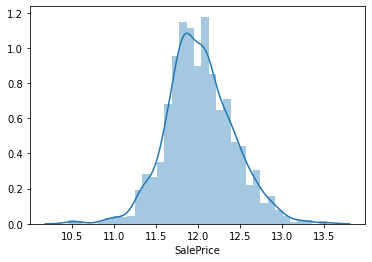

In [46]:
plt.figure()
sns.distplot(df_converted)
plt.show()

In [47]:
print("[変換後]目的変数（SalePrice）の尖度: {:.2f}".format(df_converted.kurt()))
print("[変換後]目的変数（SalePrice）の歪度: {:.2f}".format(df_converted.skew()))

[変換後]目的変数（SalePrice）の尖度: 0.81
[変換後]目的変数（SalePrice）の歪度: 0.12


対数変換を行うことで、尖度が6.54から0.81に変換され正規分布に近似できたといえる。

## 【問題7】相関係数の確認

### 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

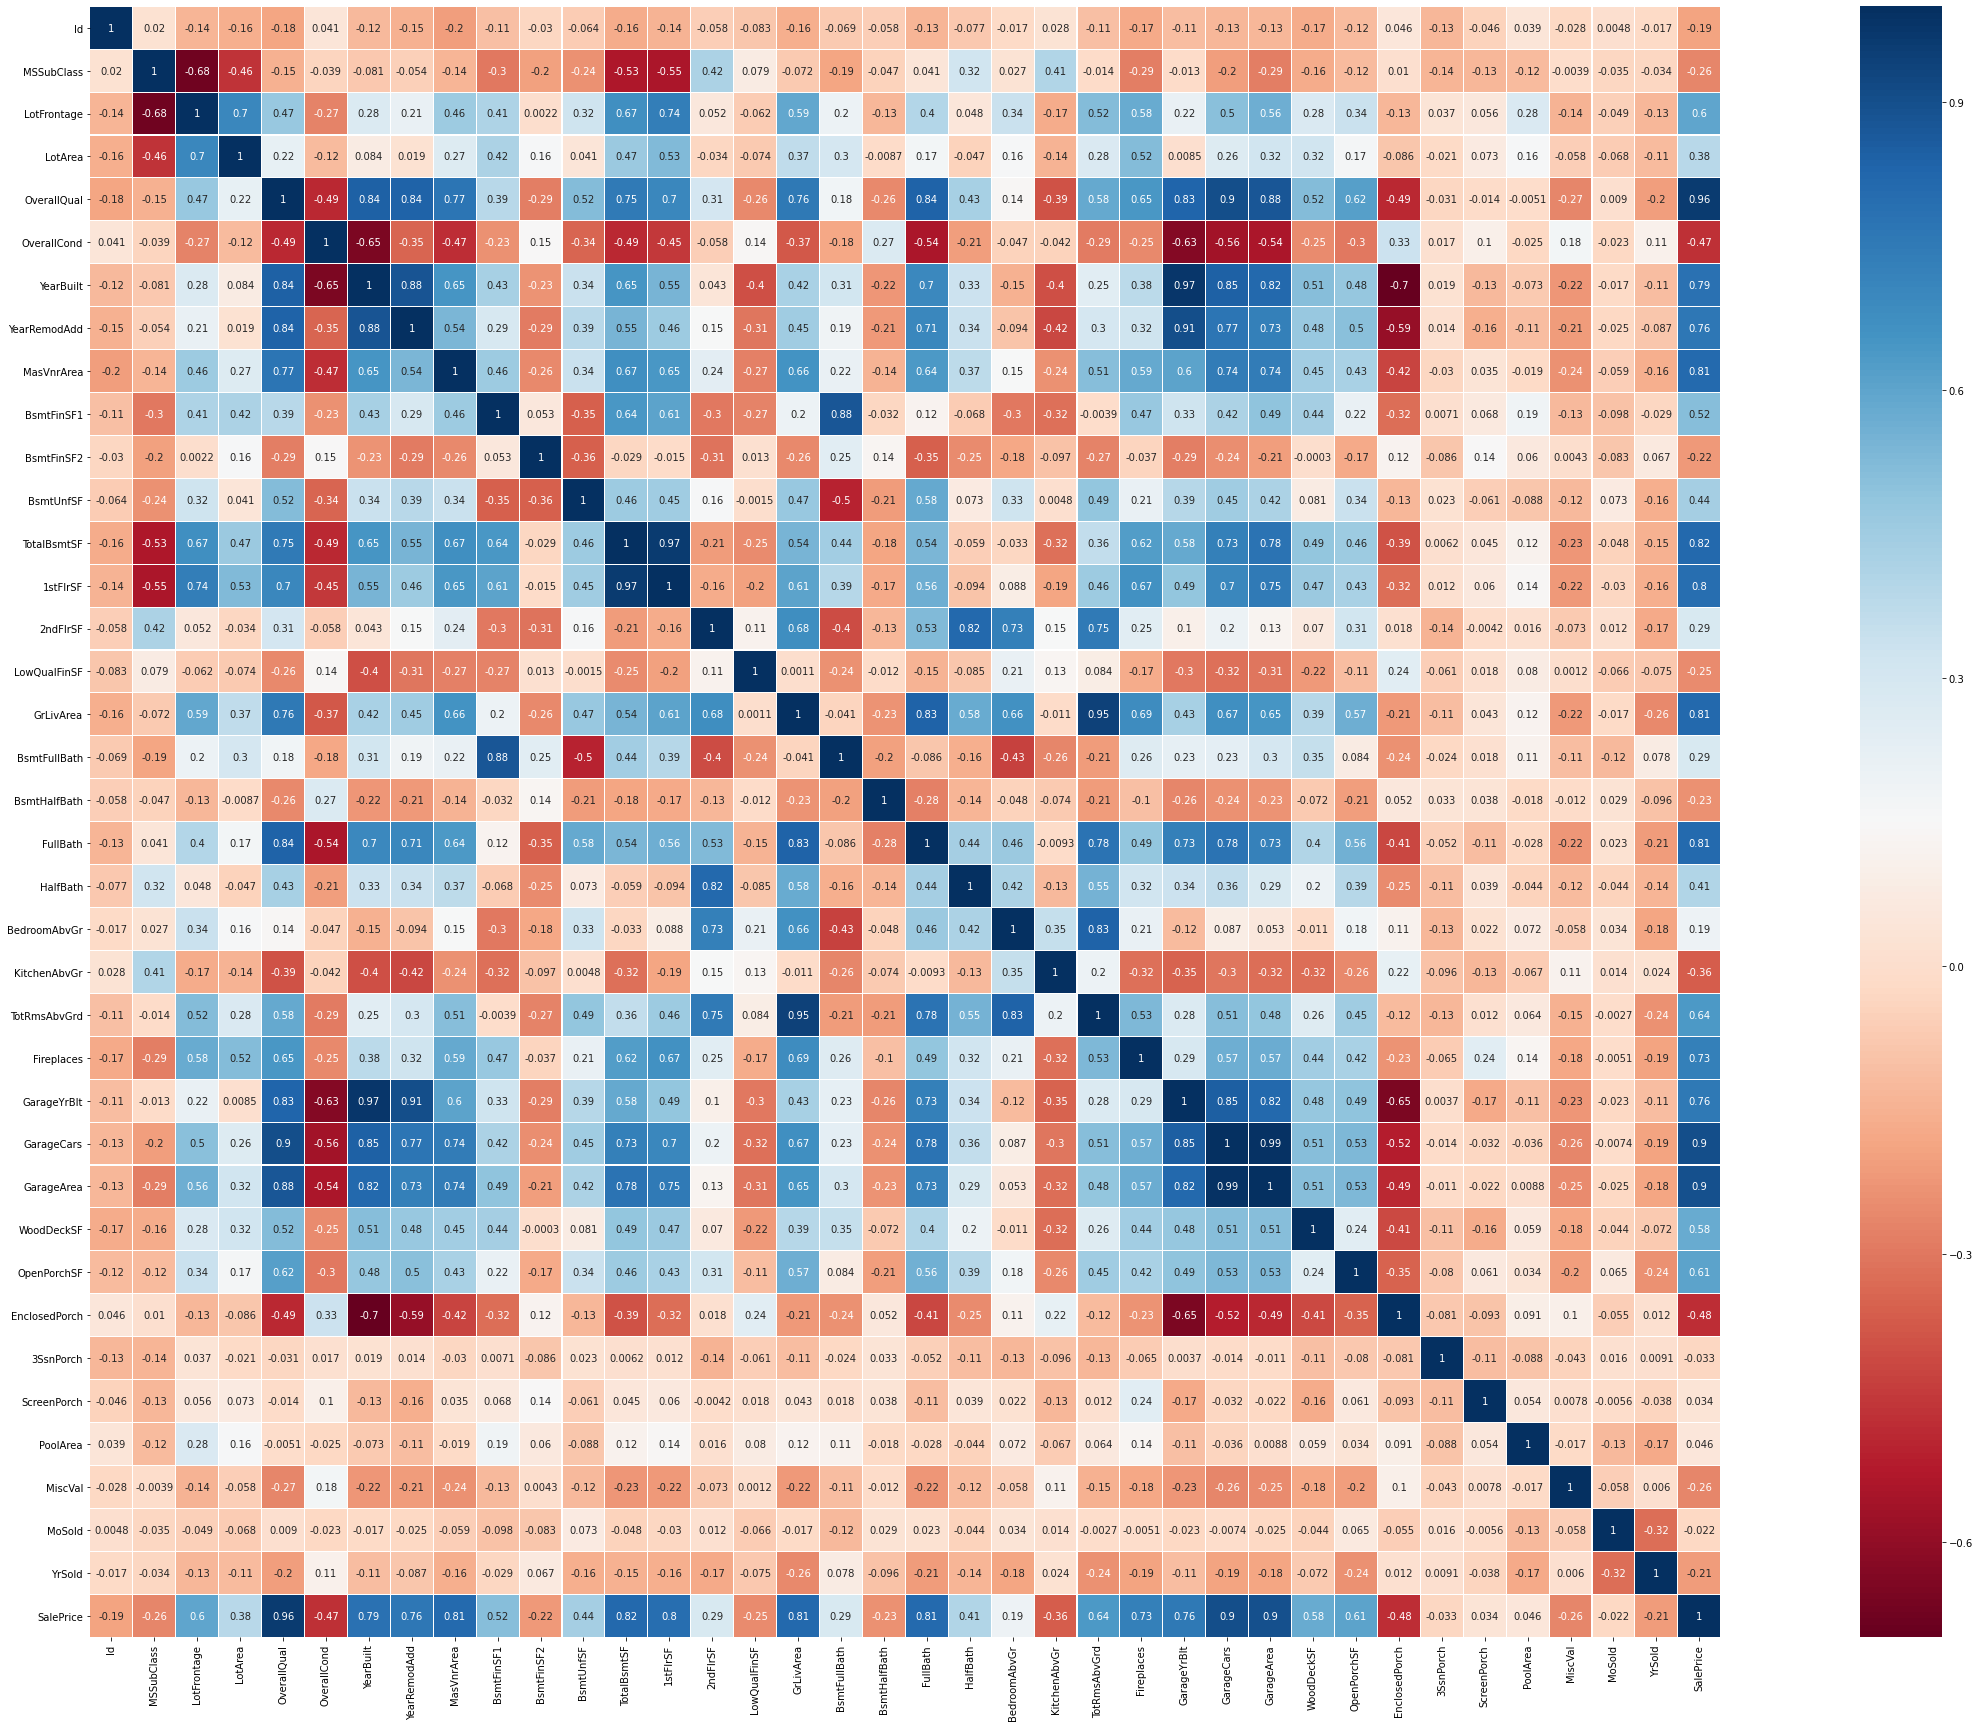

In [51]:
df_corr = df.corr()

colormap = plt.cm.RdBu
plt.subplots(figsize=(50, 30))
sns.heatmap(df_corr.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

GarageYrBitとYearBuilt、TotalBsmtSFと1stFlrSF、OverrallQualとGarageCarsの相関が高い。

### 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

In [80]:
#目的変数との相関の高い特徴量トップ10
top10 = df[df_corr['SalePrice'].sort_values(ascending = False)[1:11].index]

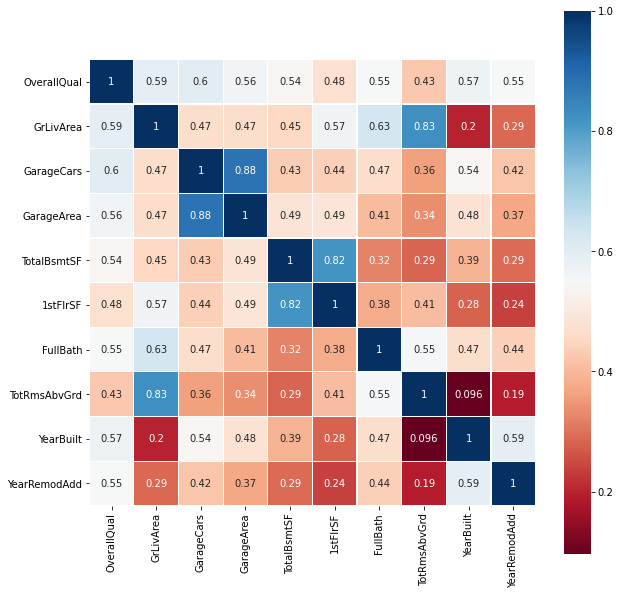

In [79]:
colormap = plt.cm.RdBu
plt.subplots(figsize=(10, 10))
sns.heatmap(top10.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

### 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

In [93]:
# 確認のため表示
top10.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

|特徴量 | 説明|
|:-|:-|
| OverallQual | 全体的な材料と仕上げの品質|
|GrLivArea|  グレード（地上）のリビングエリアの平方フィート|
|GarageCars|車のガレージのサイズ|
|GarageArea|ガレージサイズの平方フィート|
|TotalBsmtSF|地下室の総平方フィート|
|1stFlrSF|1階の平方フィート|
|FullBath|地上のフルバスルーム|
|TotRmsAbvGrd|地上にある部屋の総数（バスルームは含まれません）|
|YearBuilt|建築日|
|YearRemodAdd|改築日|

### 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

GrLivAreaとGarageCars、1stFlrSFとTotalBsmtSF、TotRmsAbvGrdとGrLivAreaの組み合わせの相関が高い。